# Project Recommendation Systems

## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Context:

Everyday a million products are being recommended to users based on popularity and other metrics on e-commerce websites. <br>
The most popular e-commerce website boosts average order value by 50%, increases revenues by 300%, and improves conversion. <br>
In addition to being a powerful tool for increasing revenues, product recommendations are so essential that customers now expect to see similar
features on all other eCommerce sites.

# Attribute Information:

- userid : unique identifier for a customer
- productid : unique identifier for a product
- ratings : rating
- timestamp : timestamp of rating

As part of this project, our objective is to make a recommendation system that recommends at least five(5)
new products based on the user's habits.

# Reading the dataset and displaying the first 10 records of the dataset.

In [2]:
rating = pd.read_csv('ratings_Electronics.csv', header=None, names =['userid', 'productid', 'ratings', 'timestamp'])

In [3]:
rating.head(10)

,userid,productid,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
5,A1QGNMC6O1VW39,0511189877,5.0,1397433600
6,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
7,A2TY0BTJOTENPG,0511189877,5.0,1395878400
8,A34ATBPOK6HCHY,0511189877,5.0,1395532800
9,A89DO69P0XZ27,0511189877,5.0,1395446400


# Checking the Shape and Type of the Data

In [4]:
rows=len(rating)
columns = len(rating.columns)
print('The dataset contains %d rows and %d columns.' %(rows,columns))
rating.info() #Displays the type of the columns that exist in the dataset

The dataset contains 7824482 rows and 4 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userid     object 
 1   productid  object 
 2   ratings    float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


- Data has 4 columns and 7.8 million ratings
- There are 4 columns in the dataset. It seems that the columns do not contain missing values.
- The first 2 columns are nominal in nature. 
- Timestamp may not be useful unless we want to build complex recommendation system where the recommendations will be based on time of the day.
- From the outset, it seems that the rating ranges from 1 to 5 and it doesn't contain the decimals.

# Frequency distribution of Ratings to confirm the scale

Text(0.5, 1.0, 'Frequency Distribution by ratings')

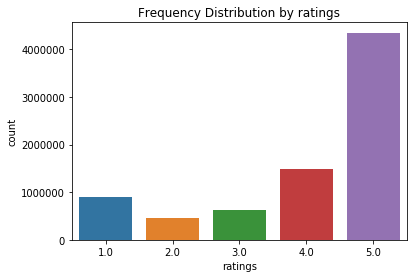

In [5]:
sns.countplot(rating['ratings']).set_title('Frequency Distribution by ratings')

In [6]:
prop = rating['ratings'].value_counts(normalize=True)
print(prop)

5.0    0.555633
4.0    0.189889
1.0    0.115249
3.0    0.080909
2.0    0.058320
Name: ratings, dtype: float64


The ratings are given on a scale of 1 to 5 and ratings do not contain decimals.<br>
~75% of the records have ratings higher than 4 indicating their popularity amongst users.

Dropping the timestamp column as it will not be used.

In [7]:
rating.drop('timestamp', axis=1, inplace=True)

# Checking for null values

In [8]:
rating.isnull().sum()

userid       0
productid    0
ratings      0
dtype: int64

No nulls detected in the columns.

# Descriptive Statistics of Rating

In [9]:
desc=rating.describe()
# print(desc)
desc['ratings']=round(desc['ratings'],2)
print(desc)

          ratings
count  7824482.00
mean         4.01
std          1.38
min          1.00
25%          3.00
50%          5.00
75%          5.00
max          5.00


### Rolling up the dataset at 
- User level : to understand the number of products that users have rated <br>
    Generally, most of the users do not rate many products
- Product level: to understand the products which were provided ratings by customer <br>
    Usually, the popular products have higher reviews/ratings. <br>In some peculiar cases, unpopular products have higher   number of low ratings.

In [10]:
user_rating = pd.DataFrame((rating.groupby(['userid'],as_index=False)
                  .agg({'ratings': [np.size, np.mean, np.sum]})
                  .rename(columns={'size': 'total_ratings', 'mean': 'avg_ratings'})))
print(user_rating.head())
print(user_rating.info())

                  userid       ratings                  
                         total_ratings avg_ratings   sum
0  A00000262KYZUE4J55XGL           1.0         5.0   5.0
1  A000063614T1OE0BUSKUT           2.0         5.0  10.0
2  A00009182QVLSWIGHLS1B           1.0         5.0   5.0
3  A00009661LC9LQPGKJ24G           1.0         5.0   5.0
4   A00010809P09NUU6ZP6H           1.0         5.0   5.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4201696 entries, 0 to 4201695
Data columns (total 4 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   (userid, )                object 
 1   (ratings, total_ratings)  float64
 2   (ratings, avg_ratings)    float64
 3   (ratings, sum)            float64
dtypes: float64(3), object(1)
memory usage: 160.3+ MB
None


In [11]:
print("#Unique users= ",len(user_rating))

#Unique users=  4201696


# Distribution of Number of products rated by Users

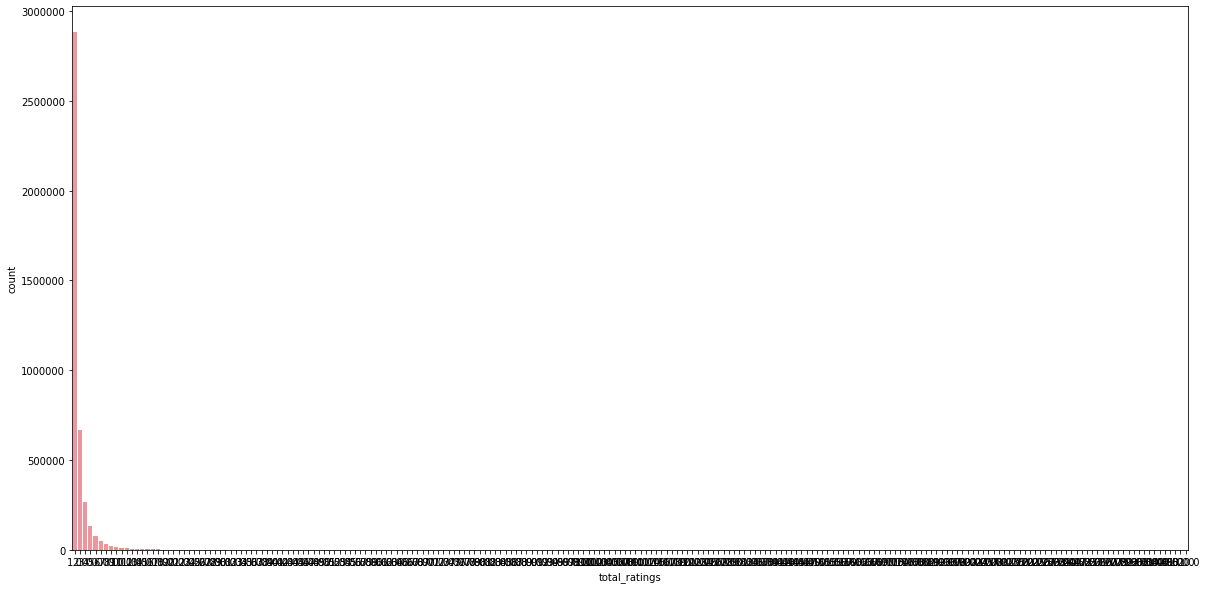

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(user_rating.ratings.total_ratings)


The vast majority of the users have rated less than 5 products.
Let us confirm that by looking at the proportions.

In [13]:
prop =pd.DataFrame(user_rating.ratings.total_ratings.value_counts(normalize=True))
prop['total_ratings']=round(prop['total_ratings'],2)
print(prop)

       total_ratings
1.0             0.69
2.0             0.16
3.0             0.06
4.0             0.03
5.0             0.02
...              ...
200.0           0.00
204.0           0.00
205.0           0.00
208.0           0.00
501.0           0.00

[215 rows x 1 columns]


~90% of the users have rated less than 4 products.
Let us look at the distribution of users who have rated 5 products or less than that.

Text(0.5, 1.0, 'Frequency Distribution of users based on number of products rated')

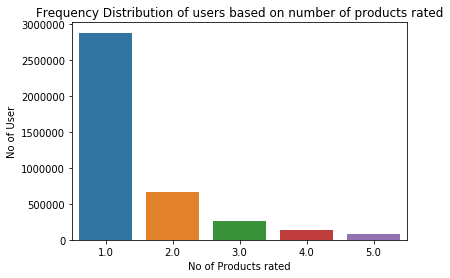

In [14]:
sns.countplot(user_rating[user_rating.ratings.total_ratings<6].ratings.total_ratings)
plt.xlabel("No of Products rated")
plt.ylabel("No of User")
plt.title('Frequency Distribution of users based on number of products rated')

    productid       ratings                  
              total_ratings avg_ratings   sum
0  0132793040           1.0    5.000000   5.0
1  0321732944           1.0    5.000000   5.0
2  0439886341           3.0    1.666667   5.0
3  0511189877           6.0    4.500000  27.0
4  0528881469          27.0    2.851852  77.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 476002 entries, 0 to 476001
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   (productid, )             476002 non-null  object 
 1   (ratings, total_ratings)  476002 non-null  float64
 2   (ratings, avg_ratings)    476002 non-null  float64
 3   (ratings, sum)            476002 non-null  float64
dtypes: float64(3), object(1)
memory usage: 18.2+ MB
None
#Unique products rated=  476002
      total_ratings
1.0            0.38
2.0            0.15
3.0            0.08
4.0            0.05
5.0            0.04
6.0            0.03
7.

Text(0.5, 1.0, 'Frequency Distribution of products based on #ratings given')

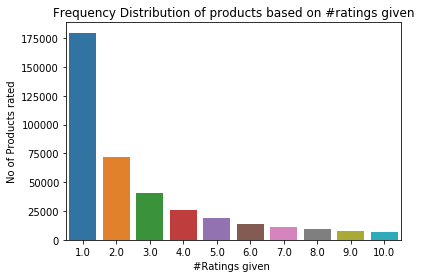

In [15]:
product_rating = pd.DataFrame((rating.groupby(['productid'],as_index=False)
                  .agg({'ratings': [np.size, np.mean, np.sum]})
                  .rename(columns={'size': 'total_ratings', 'mean': 'avg_ratings'})))
print(product_rating.head())
print(product_rating.info())
print("#Unique products rated= ",len(product_rating))
prop =pd.DataFrame(product_rating.ratings.total_ratings.value_counts(normalize=True))
prop['total_ratings']=round(prop['total_ratings'],2)
print(prop.head(10))
sns.countplot(product_rating[product_rating.ratings.total_ratings<11].ratings.total_ratings)
plt.xlabel("#Ratings given ")
plt.ylabel("No of Products rated")
plt.title('Frequency Distribution of products based on #ratings given')

##### ~90% of the customers have rated less than 4 products and at the same time, ~70% of the products have less than 4 ratings as well.

## Let us look at the top 25 products which have been rated frequently

Text(0.5, 1.0, 'Most rated products')

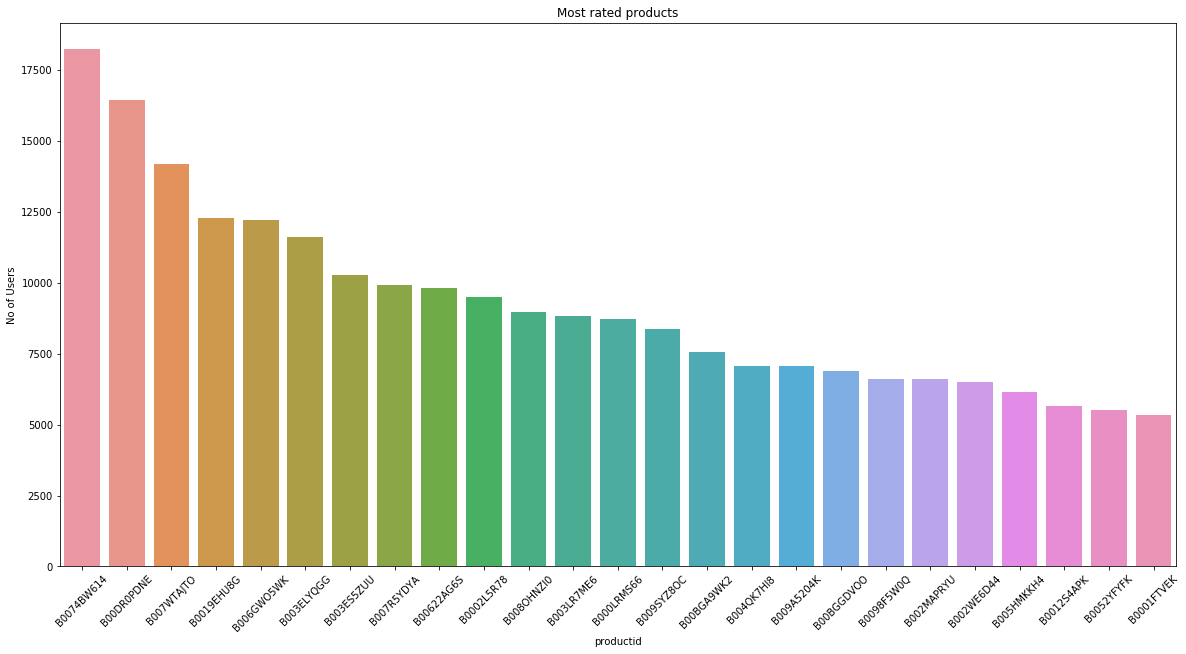

In [16]:
plt.figure(figsize=(20,10))
top25 = rating.groupby('productid')['ratings'].count().sort_values(ascending=False)[:25]
sns.barplot(top25.index, top25.values);
plt.xticks(rotation=45)
plt.ylabel("No of Users")
plt.title('Most rated products')

## Popularity based recommendation
- Considering the top 100 products (based on number of ratings) and recommending the products with highest average ratings


In [17]:
#taking the most rated products
top100 = rating.groupby('productid')['ratings'].count().sort_values(ascending=False)[:100]

#filtering the most rated products
popular = rating[rating.productid.isin(top100.index)]

#Sorting based on the highest average rating of most frequently rated products
popular = popular.groupby('productid')['ratings'].mean().sort_values(ascending=False)[:10]
recommend = pd.DataFrame({'User_id': 'A00000262KYZUE4J55XGL', 'Product': popular.index, 'Rating' : np.round(popular.values,1)})
print("Top recommendation for user A00000262KYZUE4J55XGL is \n",recommend[['Product', 'Rating']])

Top recommendation for user A00000262KYZUE4J55XGL is 
       Product  Rating
0  B0052SCU8U     4.8
1  B000B9RI14     4.8
2  B00E3W15P0     4.8
3  B000LRMS66     4.8
4  B0019EHU8G     4.8
5  B00316263Y     4.7
6  B003ES5ZUU     4.7
7  B007R5YDYA     4.7
8  B000QUUFRW     4.7
9  B002V88HFE     4.7


In [18]:
#taking the most rated products
top100 = rating.groupby('productid')['ratings'].count().sort_values(ascending=False)[:100]

#filtering the most rated products
popular = rating[rating.productid.isin(top100.index)]

#Sorting based on the highest average rating of most frequently rated products
popular = popular.groupby('productid')['ratings'].mean().sort_values(ascending=False)[:10]
recommend = pd.DataFrame({'User_id': 'A000063614T1OE0BUSKUT', 'Product': popular.index, 'Rating' : np.round(popular.values,1)})
print("Top recommendation for user A000063614T1OE0BUSKUT is \n",recommend[['Product', 'Rating']])

Top recommendation for user A000063614T1OE0BUSKUT is 
       Product  Rating
0  B0052SCU8U     4.8
1  B000B9RI14     4.8
2  B00E3W15P0     4.8
3  B000LRMS66     4.8
4  B0019EHU8G     4.8
5  B00316263Y     4.7
6  B003ES5ZUU     4.7
7  B007R5YDYA     4.7
8  B000QUUFRW     4.7
9  B002V88HFE     4.7


### Let us remove the rarely rated products (rated less than 50 times)
### Also removing users who have rated less than 50 products

- Initially tried with users who have rated at least 20 products and products which were rated at least 20 times
- However, increasing the limit from 20 to 50 as i was facing memory issues

In [19]:
user_counts=rating['userid'].value_counts()
product_counts = rating['productid'].value_counts()

user_subset = user_counts[user_counts>=50].index
product_subset = product_counts[product_counts>=50].index
rating_subset = rating[rating["userid"].isin(user_subset) & rating["productid"].isin(product_subset)]
rating_subset.head()

,userid,productid,ratings
492,A3CLWR1UUZT6TG,0972683275,5.0
631,A3TAS1AG6FMBQW,0972683275,5.0
1003,A2Y4H3PXB07WQI,0972683275,4.0
1138,A25RTRAPQAJBDJ,0972683275,5.0
1310,A3LDPF5FMB782Z,1400501466,5.0


## Importing the Surprise libraries 
## Loading the dataframe to the surprise library Dataset to build collaborative filtering model

In [20]:
from surprise import Dataset, Reader, accuracy, SVD, SVDpp, NMF, SlopeOne
from surprise import KNNBasic, KNNWithMeans, KNNBaseline, CoClustering, BaselineOnly, NormalPredictor
from surprise.model_selection import cross_validate

data = Dataset.load_from_df(rating_subset, reader=Reader(sep=',')) 

## Model Selection
- Using all the models available in surprise library to predict the ratings
- Then collecting the performance of all the models in a Dataframe to select the best suited model

- Took Abinesh's help to write the for loop

In [21]:
algorithms = [SVD(), SVDpp(), NMF(),  KNNBasic(), 
              KNNWithMeans(), KNNBaseline(), CoClustering(), 
              BaselineOnly(), NormalPredictor()]
performance = pd.DataFrame(columns=['Algorithm', 'RMSE'])
# performance['RMSE']
for algo in algorithms:
    cv = cross_validate(algo, data, measures=['rmse']) 
    performance = performance.append({
    'Algorithm': str(algo).split(' ')[0].split('.')[-1],'RMSE': cv['test_rmse'].mean()}, ignore_index=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity ma

I will be using Root Mean Squared error between True and Predicted ratings to select the model. <br>
The algorithm with the least RMSE will be picked.

In [22]:
performance

,Algorithm,RMSE
0,SVD,0.958617
1,SVDpp,0.957691
2,NMF,1.133032
3,KNNBasic,1.104212
4,KNNWithMeans,1.042144
5,KNNBaseline,1.039945
6,CoClustering,1.054298
7,BaselineOnly,0.952441
8,NormalPredictor,1.321639


In [23]:
print(performance[performance.RMSE == performance.RMSE.min()]) 


      Algorithm      RMSE
7  BaselineOnly  0.952441


BaselineOnly algorithm has the lowest RMSE. Hence, i will be sticking with this algorithm.

### Splitting the data into train test split and fitting the model

In [24]:
from surprise.model_selection import train_test_split, cross_validate
train , test = train_test_split(data, test_size=0.3, random_state=2)
model = BaselineOnly()
model.fit(train)
prediction = model.test(test)
accuracy.rmse(prediction)

Estimating biases using als...
RMSE: 0.9514


0.9514372945787344

##### Let us build Recommendation System to recommend products that haven't been purchased by users
- The build_anti_testset function will help us in extracting products which are not yet rated by users
- The model will be predicting the ratings and the products with high ratings will be suggested to users


In [26]:
recom_data = data.build_full_trainset()
recom_data = recom_data.build_anti_testset()
recom_pred = model.test(recom_data)

In [27]:
from collections import defaultdict
user_dict = defaultdict(list)
for uid, iid, r_ui, est, _ in recom_pred:
    user_dict[uid].append((iid, est)) 

Collaborative Filtering model is built for users who have rated atleast 50 products.
I had to resort to this because of memory issues.

* So below function ensures that if the userid is missing, it will print a message asking to use Popularity based recommendation system

In [40]:
def top_n_recommendations(userid):
    
    if userid in user_dict.keys():
        per_user_dict = {key : values for key, values in user_dict.items() if key == userid}
        per_user_dict[userid].sort(key = lambda x : x[1], reverse = True)
        per_user_dict[userid] = per_user_dict[userid][:10]
        print("Top {} recommended products for {} is \n" .format(10, userid))
        print(*[i[0] for i in per_user_dict[userid]], sep = '\n')
        print('\n')
    else:
        print('Use Popularity Based Recommendation System for ',userid)

In [42]:
top_n_recommendations('A1H8PY3QHMQQA0')


top_n_recommendations('A2Y4H3PXB07WQI')
top_n_recommendations('A3LDPF5FMB782Z')

Use Popularity Based Recommendation System for  A1H8PY3QHMQQA0
Top 10 recommended products for A2Y4H3PXB07WQI is 

B0019EHU8G
B0052SCU8U
B001TH7GUU
B000N99BBC
B0000BZL1P
B008JJLW4M
B008EQZ25K
B00017LSPI
B001TH7T2U
B009NB8WR0


Top 10 recommended products for A3LDPF5FMB782Z is 

B0019EHU8G
B0052SCU8U
B001TH7GUU
B000N99BBC
B003ES5ZUU
B0000BZL1P
B008JJLW4M
B008EQZ25K
B00017LSPI
B001TH7T2U




It is pure coincidence that the first four recommendations are matching for both the users.
<br> However, we can see the change as we go down the list of recommendations.
<br> A2Y4H3PXB07WQI user was recommended product B009NB8WR0. However, A3LDPF5FMB782Z was not recommended the same product.

## Observations
- This solution can be used by ecommerce portal to cross sell the related products and increase revenue
- Recommendation systems add a touch of personalization
- This will enhance the user experience as the users/ customers will come across related/ popular products
- The enhanced user experience might lead to higher conversion
- However, the relevance might be affected when the suggestions are based on popularity model alone
<br>
<br>
- Two major drawbacks are
    -- the cold start problem 
    -- and the computation intensive nature of building such models